In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import MobileNetV2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
images = '/content/drive/MyDrive/Dataset'


In [ ]:
class_names = os.listdir(images)
print(class_names)

['Monitor', 'Keyboard', 'TV', 'Mouse']


In [ ]:
image_paths = []
image_labels = []

for class_name in class_names:
    class_path = os.path.join(images, class_name)
    if os.path.isdir(class_path):
      for img_name in os.listdir(class_path) :
          img_path = os.path.join(class_path, img_name)
          # ---
          # image_paths.append(img_path)
          # image_labels.append(class_name)
          # ---
          img = load_img(img_path, target_size=(224, 224))
          img_array = img_to_array(img)/255.0
          image_paths.append(img_array)
          image_labels.append(class_name)


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
image_labels = label_encoder.fit_transform(image_labels)

In [ ]:
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(image_paths,image_labels, test_size=0.1, random_state=42)

In [ ]:
print (len(train_images))
print (len(test_images))

186
21


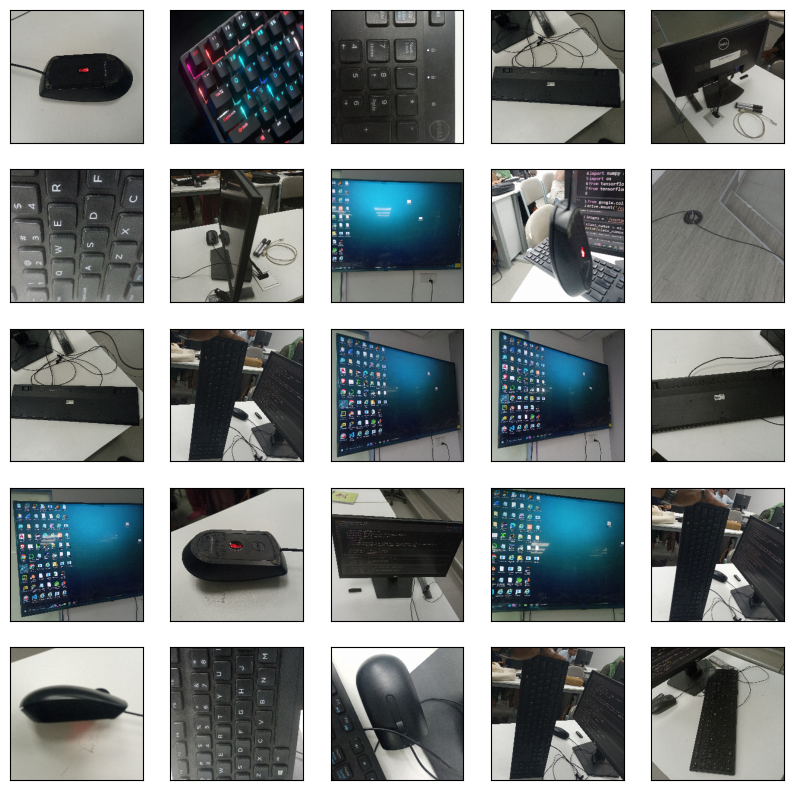

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
   plt.subplot(5,5, i+1)
   plt.xticks([])
   plt.yticks([])
   plt.grid(False)
   plt.imshow((train_images[i]))
plt.show()

In [ ]:
# model = models.Sequential()
# model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
# model.add(layers.MaxPooling2D((2,2)))
# model.add(layers.Conv2D(64,(3,3),activation='relu'))
# model.add(layers.MaxPooling2D(2,2))
# model.add(layers.Conv2D(64,(3,3),activation='relu'))



base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
# model.add(layers.Dense(64, activation='relu'))



model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(8, activation='softmax'))
# model.add(layers.Dropout(0.2))
# model.add(layers.Dense(4, activation='softmax'))
# model.add(layers.Dropout(0.2))
# model.add(layers.Dense(2, activation='softmax'))
# model.add(layers.Dropout(0.2))
# model.add(layers.Dense(1, activation='softmax'))
model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 8)                   │             136 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,629,816 (10.03 MB)

 Trainable params: 371,832 (1.42 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:


# model.add(layers.Flatten())
# model.add(layers.Dense(64,activation='relu'))
# model.add(layers.Dense(8, activation="softmax"))

In [ ]:
train_images = np.array(train_images)
test_images = np.array(test_images)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


6/6 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.2764 - loss: 1.9566 - val_accuracy: 0.4286 - val_loss: 1.5959
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - accuracy: 0.3691 - loss: 1.7175 - val_accuracy: 0.5714 - val_loss: 1.2804
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.4652 - loss: 1.4476 - val_accuracy: 0.6667 - val_loss: 1.0542
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5860 - loss: 1.1645 - val_accuracy: 0.6667 - val_loss: 0.8515
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.6019 - loss: 1.0877 - val_accuracy: 0.6190 - val_loss: 0.7812
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.6307 - loss: 0.9180 - val_accuracy: 0.7143 - val_loss: 0.5761
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.7052 - loss: 0.7407 - val_accuracy: 0.9048 - val_loss: 0.3487
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.7709 - loss: 0.5732 - val_accuracy: 0.9524 - val_loss: 0.2560
Epoch 9/10


1/1 - 0s - 64ms/step - accuracy: 1.0000 - loss: 0.0470


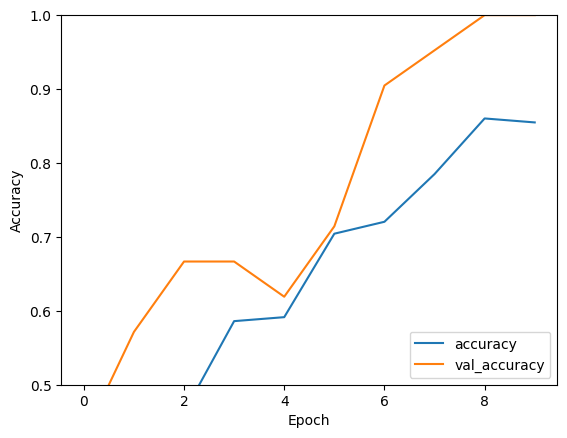

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])

plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:


print(test_acc);

1.0


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


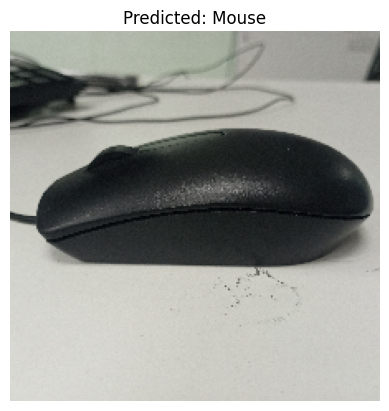

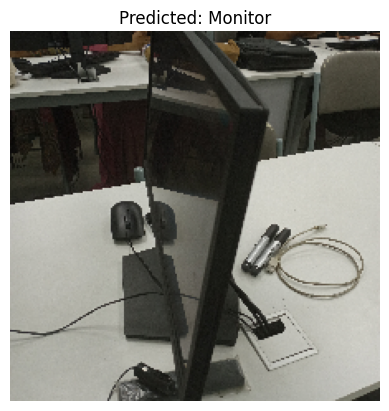

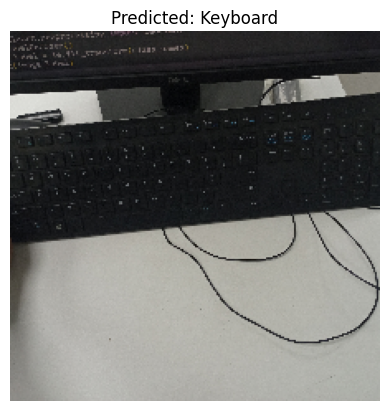

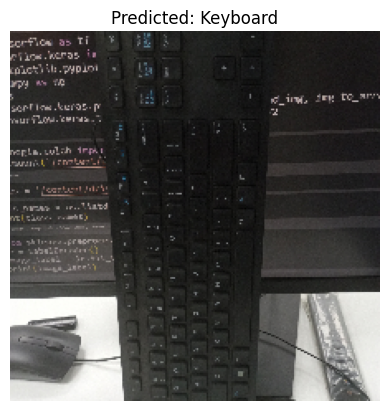

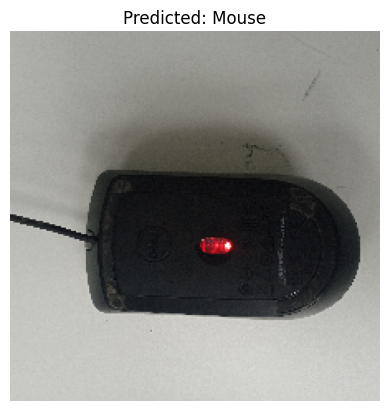

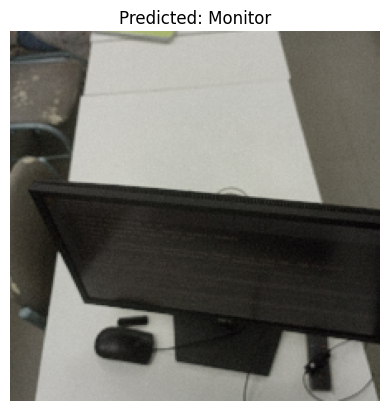

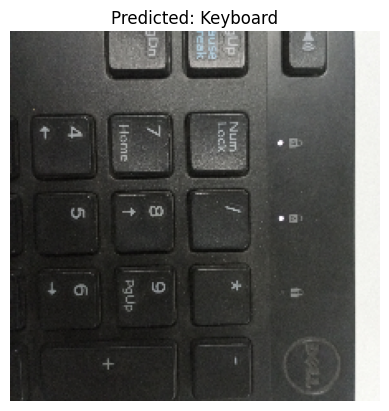

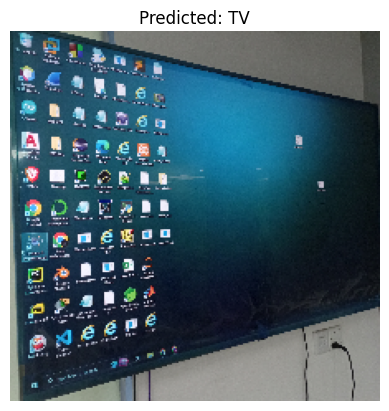

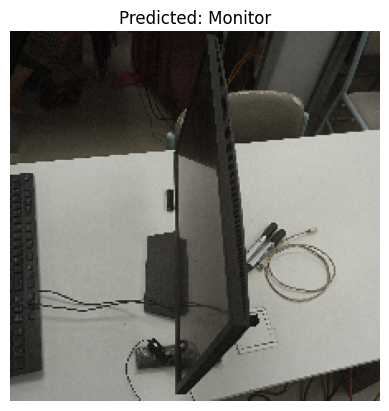

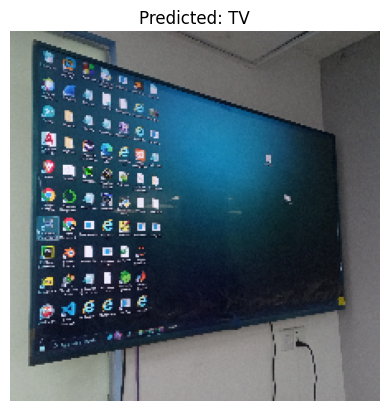

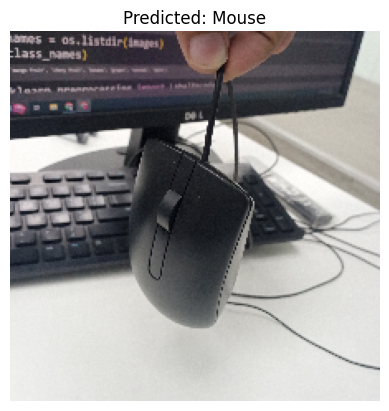

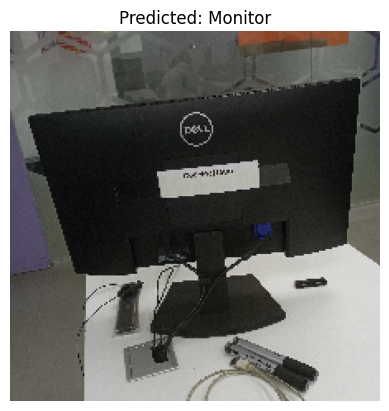

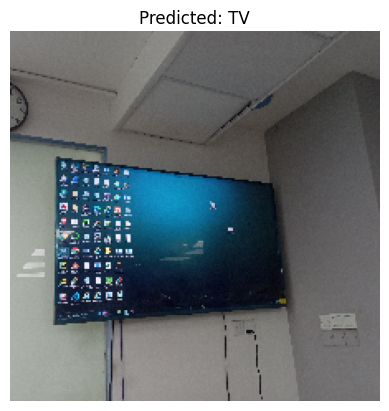

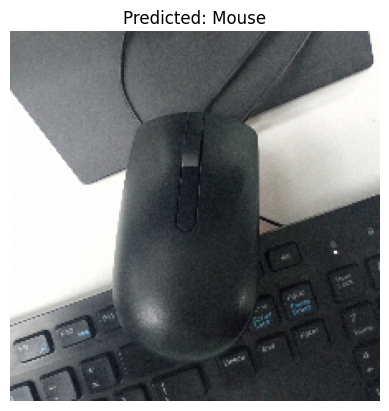

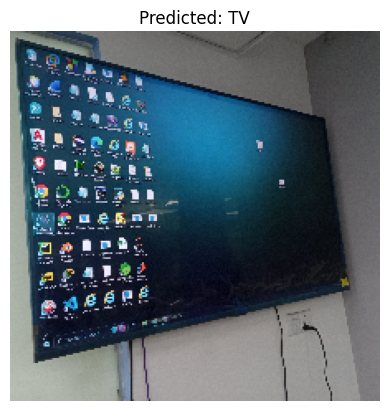

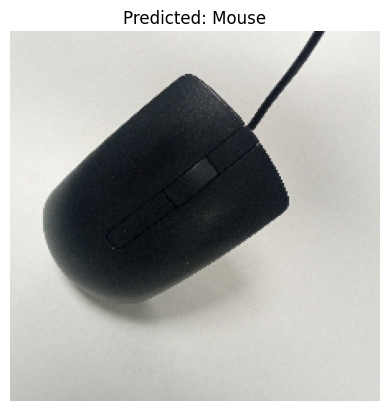

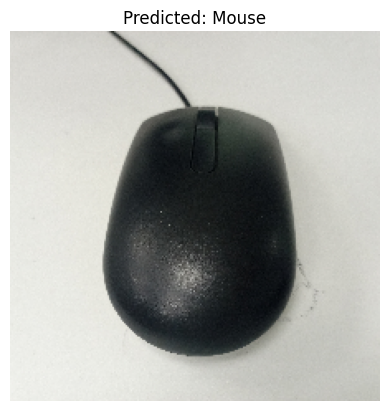

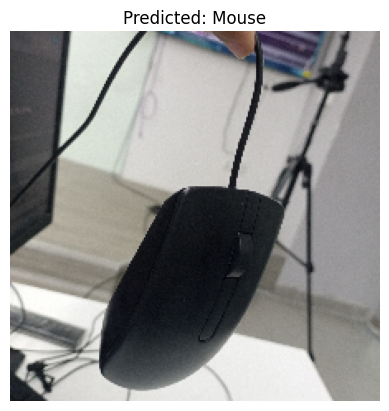

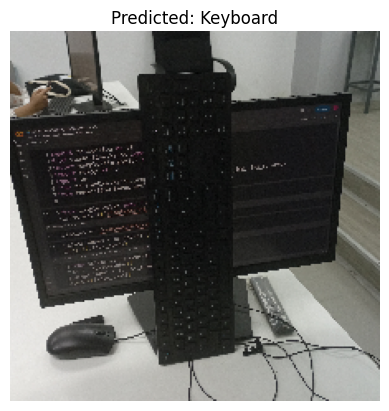

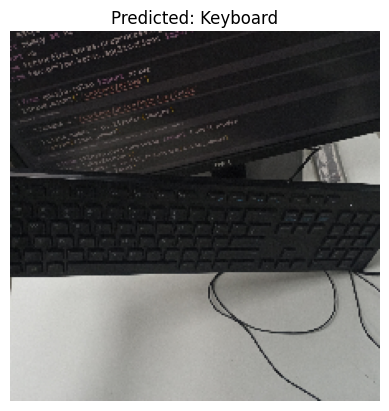

In [ ]:
predictions = model.predict(test_images)
predicted_indices = np.argmax(predictions, axis=1)
predicted_class_names = label_encoder.inverse_transform(predicted_indices)

def display_predictions(index):
    plt.imshow(test_images[index])
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class_names[index]}")
    plt.show()


for i in range(20):
    display_predictions(i)

Enter the path of image: /content/istockphoto-1356366044-612x612.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


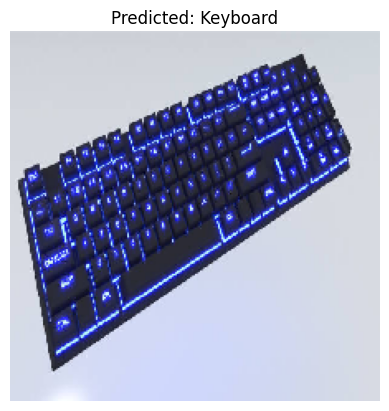

In [ ]:
from tensorflow.keras.preprocessing import image

def load_and_preprocess_image(image_path):
  img = image.load_img(image_path, target_size=(224, 224))
  img_array = image.img_to_array(img)
  img_array = img_array/255
  img_array = np.expand_dims(img_array, axis=0)
  return img, img_array

image_path = input("Enter the path of image: ")
img, img_array = load_and_preprocess_image(image_path)

predictions = model.predict(img_array)
predicted_indices = np.argmax(predictions)
predicted_class_name = label_encoder.inverse_transform([predicted_indices])[0]



plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {predicted_class_name}")
plt.show()

# print(f"Predicted class: {predicted_class_name}")